# Analyse d'une image de microscopie à l'aide du module scikit image
Ce notebook à pour objectif d'ilustrer une utilisation simplifé du module scikit image pour l'analyse d'une image issue d'un microscope photonique à épifluorescence.

In [1]:
# Module standard
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Module pour la manipulation d'image
import skimage.io
import skimage.exposure
import skimage.measure
import skimage.filters

# module d'intéraction avec le système
import sys
import os

# Fonction pour le téléchargement de l'image à analiser
from urllib.request import urlretrieve

## Chargement de l'image à analyser, décompréssion de l'image et visualisation de l'image

On cherche à compter le nombre de noyaux, ainsi que leurs taille et leurs intensité de fluorescence.

In [2]:
# Téléchargement de l'image si elle n'est pas présente dans le répertoire
# courrant.
if not os.path.isfile('FluorescentCells.zip'):
    print('Downloading the TIFF file for fluorescent cells image...')
    try:
        urlretrieve('https://imagej.nih.gov/ij/images/FluorescentCells.zip',
            'FluorescentCells.zip')
        print("ok")
    except:
        print("Unable to download the file!")
    print('Done!')

# Décompression du fichier FluorescentCells.zip si l'image n'est pas
# décompréssée.
if not os.path.isfile("FluorescentCells.tif"):
    !unzip FluorescentCells.zip

Chargement de l'image dans un array numpy, provennant d'[NIH](https://imagej.nih.gov/ij/images/FluorescentCells.zip).

In [3]:
img = skimage.io.imread("FluorescentCells.tif")

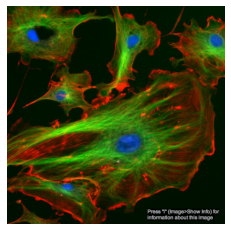

In [4]:
plt.imshow(img)
plt.axis("off");

L'image ci-dessus dont une description est disponible [ici](https://imagej.nih.gov/ij/images/FluorescentCells.txt) , que l'on va analiser, est une image de cellules endothéliales d'artère pulmonaire bovine. En bleu, il s'agit d'un marquage des noyaux à l'aide du DAPI. En vert, il s'agit d'un marquage de la tubuline. Puis en rouge, il s'agit d'un marquage des microtubules.  

L'image est en RGB, est composé d'un canal pour chacune des couleurs.

## Sélection du canal d'intérêt
Le canal d'intérêt est le bleu, puisque qu'il représente les noyaux marqué au DAPI.

In [5]:
canal_blue = img[:, :, 2]

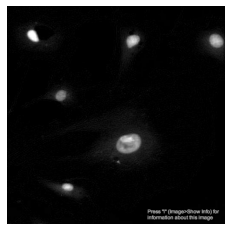

In [6]:
plt.imshow(canal_blue, cmap="gray")
plt.axis("off");

La sélection effectuée permet d'identifier clairement les noyaux.

## Estimation du seuil de sélection des noyaux

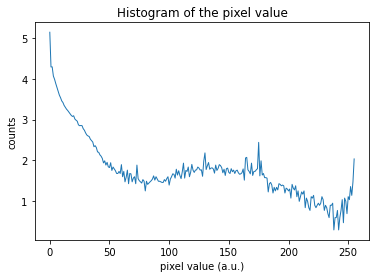

In [7]:
hist, bins = skimage.exposure.histogram(canal_blue)
plt.plot(bins, np.log10(hist+1), linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('counts')
#plt.ylim(0, 200)
plt.title("Histogram of the pixel value");

On remarque un minimum local en 80 pour la valeur des pixels. Nous allons donc prendre une valeur de seuil de 80 pour la sélection des noyaux.

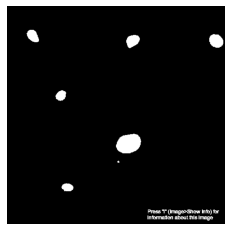

In [8]:
seuil = 80
img_noyau = canal_blue > seuil
plt.imshow(img_noyau, cmap="gray")
plt.axis("off");

On remarque qu'en utilisant un seuil de 80, on a une sélection spécifique des noyaux. Hormis la zone de texte en bas à droite de l'image et d'une petite zone non spécifique d'un noyau.

### Ajout d'un filtre gaussien

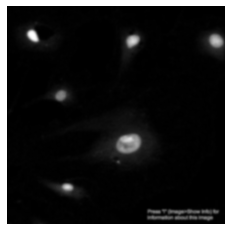

In [9]:
nuclei_filtered = skimage.filters.gaussian(canal_blue, sigma=2)
plt.imshow(nuclei_filtered, cmap="gray")
plt.axis("off");

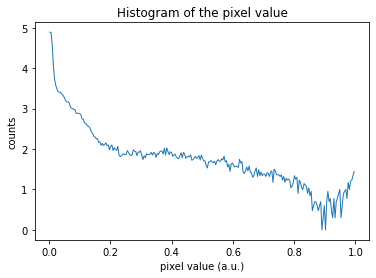

In [10]:
hist, bins = skimage.exposure.histogram(nuclei_filtered)
plt.plot(bins, np.log10(hist), linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('counts')
#plt.ylim(0, 200)
plt.title("Histogram of the pixel value");

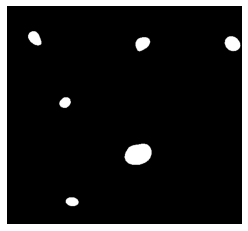

In [11]:
seuil = 0.3
img_noyau = nuclei_filtered > seuil
plt.imshow(img_noyau[:475, :], cmap="gray")
plt.axis("off");

On remarque qu'avec l'application d'un filtre gaussien et l'utilisation d'un seuil de 0.3, on obtient une sélection plus spécifique des nouyaux.

## Comptage du nombre de noyaux

In [12]:
labels = skimage.measure.label(img_noyau[:475,:])
print(labels.max())

6


On obtient un comptage de 6 noyaux pour cette image, une fois le texte enlever.